<a href="https://colab.research.google.com/github/pratikgujral/Learn-Transformers/blob/main/Transformers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q transformers datasets xformers sentencepiece

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 41.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.6/485.6 kB 30.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.1/109.1 MB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 49.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 62.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 67.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 18.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 59.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

# Pipeline
There are pipelines for several types of tasks readily available in the `transformers` library.

In [ ]:
from transformers import pipeline

### Sentiment Analysis pipeline

In [ ]:
## Creating a pipeline for sentiment analysis.
## This pipeline will use the default model set for the task.
classifier = pipeline('sentiment-analysis')

classifier.predict(
    ['This movie was a horror movie. I like watching horror.',
     'This pudding tastes bland']
)

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


[{'label': 'POSITIVE', 'score': 0.9815176129341125},
 {'label': 'NEGATIVE', 'score': 0.9996724128723145}]

Simply passing the list to the pipeline object also works.

In [ ]:
classifier(
    ['This movie was a horror movie. I like watching horror.',
     'This pudding tastes bland']
)

[{'label': 'POSITIVE', 'score': 0.9815176129341125},
 {'label': 'NEGATIVE', 'score': 0.9996724128723145}]

### Zero shot classification pipeline

It is a text classification pipeline to predict the label of the input text.

In [ ]:
classifier = pipeline('zero-shot-classification')

classifier([
    'this is an example notebook for using the transformers library',
    'Bhartiya Janta Party has been winning many elections lately',
    '7 साल में दिल्ली के PM-2.5 और PM-10 के स्तर में 30% की गिरावट: केजरीवाल'
], candidate_labels=['education', 'politics', 'events', 'entertainment'])

No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


[{'sequence': 'this is an example notebook for using the transformers library',
  'labels': ['events', 'entertainment', 'education', 'politics'],
  'scores': [0.5622214078903198,
   0.2550264298915863,
   0.1196880042552948,
   0.06306417286396027]},
 {'sequence': 'Bhartiya Janta Party has been winning many elections lately',
  'labels': ['politics', 'events', 'entertainment', 'education'],
  'scores': [0.7305487990379333,
   0.24770037829875946,
   0.01709085889160633,
   0.004659924190491438]},
 {'sequence': '7 साल में दिल्ली के PM-2.5 और PM-10 के स्तर में 30% की गिरावट: केजरीवाल',
  'labels': ['events', 'entertainment', 'politics', 'education'],
  'scores': [0.6858853697776794,
   0.1147824302315712,
   0.1091599091887474,
   0.09017231315374374]}]

### Text generation pipeline

In [ ]:
generate = pipeline('text-generation')

print(generate('What are you doing this', num_return_sequences=4, max_new_tokens=20))

print(generate('In this course I will teach you how to', num_return_sequences=4, max_new_tokens=20))

No model was supplied, defaulted to gpt2 and revision 6c0e608 (https://huggingface.co/gpt2).
Using a pipeline without specifying a model name and revision in production is not recommended.


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'What are you doing this on the internet?"\n\nIt was me and my friend Eric Boudreau who made this video'}, {'generated_text': 'What are you doing this weekend. I can\'t keep up?"\n\nFor the uninitiated, we know the two'}, {'generated_text': 'What are you doing this for?" asked Tom on the phone, his jaw dropped. "I\'m doing this for a cause'}, {'generated_text': "What are you doing this for?\n\nThis whole thing has been an insane thing and that's great for us and we"}]
[{'generated_text': 'In this course I will teach you how to play in a world based online multiplayer game. The players are given a large amount of tools in terms'}, {'generated_text': 'In this course I will teach you how to create and run your own webapp development framework using Ruby on Rails. I also provide tutorials for developing'}, {'generated_text': 'In this course I will teach you how to set up your own personal business and make a profit using an agile system.\n\nThis course is'}, {'generated

### Other models
We can specify the model to be used for the task.


In [ ]:
generate = pipeline('text-generation', model='distilgpt2')
## distilgpt2 is a distilled (smaller) version of GPT-2

generate('I am heading to the supermarket', num_return_sequences=4, max_length=30)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': "I am heading to the supermarket. It is a pretty great opportunity to shop for free but for them, so I'm looking into buying the bag of"},
 {'generated_text': "I am heading to the supermarket, and I am pretty clear that things will get pretty rough here. If it doesn't, it will still be very"},
 {'generated_text': 'I am heading to the supermarket. I hope he\'s happy enough to let me in."'},
 {'generated_text': 'I am heading to the supermarket and looking for something to buy the things I need.\n\n\n\nWhen I went first, I decided that I'}]

### Filling mask

In [ ]:
fillmask = pipeline('fill-mask')
fillmask('I told him to bring a <mask> along with him to the party.')

No model was supplied, defaulted to distilroberta-base and revision ec58a5b (https://huggingface.co/distilroberta-base).
Using a pipeline without specifying a model name and revision in production is not recommended.


[{'score': 0.03388902172446251,
  'token': 1441,
  'token_str': ' friend',
  'sequence': 'I told him to bring a friend along with him to the party.'},
 {'score': 0.021068697795271873,
  'token': 1040,
  'token_str': ' book',
  'sequence': 'I told him to bring a book along with him to the party.'},
 {'score': 0.020387286320328712,
  'token': 4806,
  'token_str': ' bike',
  'sequence': 'I told him to bring a bike along with him to the party.'},
 {'score': 0.017366837710142136,
  'token': 7304,
  'token_str': ' bottle',
  'sequence': 'I told him to bring a bottle along with him to the party.'},
 {'score': 0.017116010189056396,
  'token': 4437,
  'token_str': ' beer',
  'sequence': 'I told him to bring a beer along with him to the party.'}]

In [ ]:
translator = pipeline('translation_en_to_fr')

translator('The server installed on the second floor of the main IT building caught fire.')

No model was supplied, defaulted to t5-base and revision 686f1db (https://huggingface.co/t5-base).
Using a pipeline without specifying a model name and revision in production is not recommended.


/usr/local/lib/python3.10/dist-packages/transformers/models/t5/tokenization_t5_fast.py:155: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-base automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  warnings.warn(


[{'translation_text': 'Le serveur installé au deuxième étage du bâtiment principal des TI a pris feu.'}]

### Named entity recognition

In [ ]:
ner = pipeline('ner', aggregation_strategy="simple")

ner(['Shyam lives on the second floor of the appartment in the city of New York.'])

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision f2482bf (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


[[{'entity_group': 'PER',
   'score': 0.99482733,
   'word': 'Shyam',
   'start': 0,
   'end': 5},
  {'entity_group': 'LOC',
   'score': 0.99947196,
   'word': 'New York',
   'start': 65,
   'end': 73}]]

### Question Answering

In [ ]:
qa = pipeline('question-answering')

qa(
   question = 'Where do I live?',
   context = 'My name is Pratik. I was born in New Delhi, and currently live there. However, I have travelled across many cities in the states of Uttranchal, Himachal Pradesh and Karnataka.'
)

No model was supplied, defaulted to distilbert-base-cased-distilled-squad and revision 626af31 (https://huggingface.co/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


{'score': 0.9807660579681396, 'start': 33, 'end': 42, 'answer': 'New Delhi'}


| **Task**                     | **Description**                                                                                              | **Modality**    | **Pipeline identifier**                       |
|------------------------------|--------------------------------------------------------------------------------------------------------------|-----------------|-----------------------------------------------|
| Text classification          | assign a label to a given sequence of text                                                                   | NLP             | pipeline(task=“sentiment-analysis”)           |
| Text generation              | generate text given a prompt                                                                                 | NLP             | pipeline(task=“text-generation”)              |
| Summarization                | generate a summary of a sequence of text or document                                                         | NLP             | pipeline(task=“summarization”)                |
| Image classification         | assign a label to an image                                                                                   | Computer vision | pipeline(task=“image-classification”)         |
| Image segmentation           | assign a label to each individual pixel of an image (supports semantic, panoptic, and instance segmentation) | Computer vision | pipeline(task=“image-segmentation”)           |
| Object detection             | predict the bounding boxes and classes of objects in an image                                                | Computer vision | pipeline(task=“object-detection”)             |
| Audio classification         | assign a label to some audio data                                                                            | Audio           | pipeline(task=“audio-classification”)         |
| Automatic speech recognition | transcribe speech into text                                                                                  | Audio           | pipeline(task=“automatic-speech-recognition”) |
| Visual question answering    | answer a question about the image, given an image and a question                                             | Multimodal      | pipeline(task=“vqa”)                          |
| Document question answering  | answer a question about a document, given an image and a question                                            | Multimodal      | pipeline(task="document-question-answering")  |
| Image captioning             | generate a caption for a given image                                                                         | Multimodal      | pipeline(task="image-to-text")                |


## Translation

In [ ]:
from transformers import pipeline

translator = pipeline("translation", model="Helsinki-NLP/opus-mt-en-hi")
translator("How are you dude?")

/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:194: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


[{'translation_text': 'आप दोस्त कैसे हैं?'}]

Transformer models can be broadly classified into three categories:
1. **Auto-Regressive**: E.g.: GPT-like models
2. **Auto-encoding**: E.g. BeRT-like models
3. **sequence-to-sequence Transformer models**: E.g. BART, T5, Marian, mBART


Models are composed of two blocks: Encoder block and decoder block



More deatils of functioning of Transformers on [Jay Alammar's blog](http://jalammar.github.io/illustrated-transformer/).


Each of these parts can be used independently, depending on the task:

* **Encoder-only model**: Good for tasks that require understanding of the input, such as sentence classification and named entity recognition. E.g. BeRT
* **Decoder-only models**: Good for generative tasks such as text generation. E.g, GPT
* **Encoder-decoder models** or **sequence-to-sequence models**: Good for generative tasks that require an input, such as translation or summarization.

![Transformer Architecture](https://huggingface.co/datasets/huggingface-course/documentation-images/resolve/main/en/chapter1/transformers.svg)

The first attention layer in a decoder block pays attention to all (past) inputs to the decoder, but the second attention layer uses the output of the encoder. It can thus access the whole input sentence to best predict the current word. This is very useful as different languages can have grammatical rules that put the words in different orders, or some context provided later in the sentence may be helpful to determine the best translation of a given word.

The attention mask can also be used in the encoder/decoder to prevent the model from paying attention to some special words — for instance, the special padding word used to make all the inputs the same length when batching together sentences.

----

# Encoder architectures
- An encoder block is used to encode a sequence of text.
- So, if our input to encoder is three words- "Welcome to India", the output from encoder will be three vectors- each corresponding to an input word. This numerical representation is also called as **feature vector** or **feature tensor**.
- The dimension of the feature vector is defined by the architecture of the model. For example, for the base BeRT model, feature vectors were of length 768.
- As with previous word embedding techniques, these numerical embeddings are contextualized.
- These feature vectors are constructed through the self-attention mechanism.Hence, the representation of a word in a sequence is affected by the other words present in the sequence.




Encoder models use only the encoder of a Transformer model. At each stage, the attention layers can access all the words in the initial sentence. These models are often characterized as having “bi-directional” attention, and are often called **auto-encoding** models.

### Key-words
* Bi-directional
* Self-attention

## When to use encoder models?
- Sequence classification, NER, question answering, masked language models
- Tasks that require understanding natural language (NLU)
- Examples of encoder models: BERT, DistilBERT, RoBERTa, AlBERT, ELECTRA etc.

---

# Decoder architectures
* Examples: GPT-2, GPT-3, CTRL, Transformer XL
* Decoder architectures can be used for all the tasks that we use an encoder models for, but decoder models generally have lower performance than encoder models for those tasks.
 * For example, we can pass the three words- "Welcome to India" to decoder architecture, and at the output, we will get a sequence of three feature vectors- each corresponding to a word in the input sequence.

### Key words
* Uni-directional
* Auto-regressive
* Masked self-attention + Cross-attention

## Decoder different from Encoder
* The primary difference between a decoder and encoder is the way attention mechanism is implemented.

* Encoders use self-attention. An encoder will input the entire sequence in one-go.
* Decoders perform masked-self attention and cross-attention. Masked self-attention means that the future-words are not available to the decoder. When calculating the vector for the word "to" in the sequence "Welcome to India" it will only see "Welcome", whereas "India" would be masked. Hence, for a decoder only the words appearing on the left are used to understand the context (not necessarily left, but it is restricted to one side of the word). This is unlike encoder architectures, where bi-directional context is used.

## When to use decoder models


*   Having access to only the left (or right) context, decoders are good at generating sequences. This is known as **causal language modelling**.



## Why are decoder models called autoregressive models?

Decoder models take only one input (previous output) at a time, and generate the next word in sequence. All words generated so far are added to the input sequence to generate the next word. Because past outputs are used in the next input step, these models are called as autoregressive.

My --> name
My name --> is
My name is --> Pratik

We can continue generating, till `<EOS>` is generated. Else, like encoder, decoders also have a maximum context length that they can generate by the design of the architecture. E.g. GPT-2 has a maximum context length of 1024 tokens. This means that GPT-2 could generate 1024 words while still retaining the context of the first word in the sequence.


----

# Sequence to Sequence Models (Encoder-Decoder models)
* **Examples**: T5, BART, mBART, M2M100, ProphetNet, mT5, Pegasus, MarianMT
* **Encoder** takes a sequence of words as inputs, casts them through the encoder, and retrieves a numerical representation for each word called feature vectors. This numerical representation holds the contextual meaning of all words appearing in sequence.
* **Decoder** takes the output of the encoder as input. Addition to the encoder output, we also provide the past decoder output sequence as input to the decoder. When there is no initial sequence to provide as an input to the decoder, we provice it a dummy value that indicates 'Start of Sequence'.

### Encoder and Decoder together
Encoder inputs a sequence as inputs, computes a prediction and outputs a numerical representation. Then, this (final) numerical representation is sent to the decoder. The encoder's job is done here.

The decoder, uses the numerical representation received from encoder along with its own sequence (intially, "start of sequence"), and "decodes" the sequence. The decoder decodes the sequence and outputs a word. The words that are generated by the decoder are fed-back to the input of the decoder in an autoregressive manner.

* Weights are nto necessarily shared between encoder and decoder
* Input distribution may not be same as output distribution
* While multiple encoder-decoder models are already available, one can also sticth together an encoder model (such as BERT) and decoder model (such as GPT) to create encoder decoder model. This is often useful, when we have a specific task at hand, and we specifically handpick an encoder and decoder that have proven theri worth on these specific tasks.

### When to use Encoder-Decoder architectures?
- Seqeuence to sequence tasks- many-to-many: translation, summarization

-----

# Bias and Limitations
As LLMs are trained on large corpus of real-world text, they often reflect the biases that exist in the society.

 The pretrained models we use could very easily generate sexist, racist, or homophobic content. Fine-tuning the model on your data won't make this intrinsic bias disappear.

In [ ]:
from transformers import pipeline

unmasker = pipeline('fill-mask', 'bert-base-uncased')
unmasker('This man works as a [MASK].')

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


[{'score': 0.07510633766651154,
  'token': 10533,
  'token_str': 'carpenter',
  'sequence': 'this man works as a carpenter.'},
 {'score': 0.04641911759972572,
  'token': 5160,
  'token_str': 'lawyer',
  'sequence': 'this man works as a lawyer.'},
 {'score': 0.03914574533700943,
  'token': 7500,
  'token_str': 'farmer',
  'sequence': 'this man works as a farmer.'},
 {'score': 0.032801393419504166,
  'token': 6883,
  'token_str': 'businessman',
  'sequence': 'this man works as a businessman.'},
 {'score': 0.029292341321706772,
  'token': 3460,
  'token_str': 'doctor',
  'sequence': 'this man works as a doctor.'}]

In [ ]:
unmasker('This lady works as a [MASK].')

[{'score': 0.15796832740306854,
  'token': 10850,
  'token_str': 'maid',
  'sequence': 'this lady works as a maid.'},
 {'score': 0.13768956065177917,
  'token': 6821,
  'token_str': 'nurse',
  'sequence': 'this lady works as a nurse.'},
 {'score': 0.08666382730007172,
  'token': 3836,
  'token_str': 'teacher',
  'sequence': 'this lady works as a teacher.'},
 {'score': 0.05339391529560089,
  'token': 13877,
  'token_str': 'waitress',
  'sequence': 'this lady works as a waitress.'},
 {'score': 0.033732496201992035,
  'token': 19215,
  'token_str': 'prostitute',
  'sequence': 'this lady works as a prostitute.'}]

# Part-2

A simple pipeline

In [ ]:
from transformers import pipeline

classifier = pipeline("sentiment-analysis")
classifier(
    [
        "I've been waiting for a HuggingFace course my whole life.",
        "I hate this so much!",
    ]
)

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


[{'label': 'POSITIVE', 'score': 0.9598048329353333},
 {'label': 'NEGATIVE', 'score': 0.9994558691978455}]

There are 3 main components running underneath the pipeline function.
1. Tokenization
2. Model
3. Postprocessing

![Pipeline steps](https://huggingface.co/datasets/huggingface-course/documentation-images/resolve/main/en/chapter2/full_nlp_pipeline.svg)

### Tokenization
Tokenization process consists of several steps:
1. Split the raw text into **tokens**. They can be words, parts of words or punctuation.
E.g. `A stitch in time saves nine.` --> `['A', 'stitch', 'in', 'time', 'saves', 'nine', '.']`
2. Add **special tokens**: Depending on how the model expects these special tokens, they are added to the model. Some of the common special tokens include `[CLS]`, `[SEP]` at beginning and end of sentences respectively.
Eg.: `['A', 'stitch', 'in', 'time', 'saves', 'nine', '.']` --> `[[CLS], 'A', 'stitch', 'in', 'time', 'saves', 'nine', '.', [SEP]]`
3. **Tokens to numbers**: Each token is replaced with its unique number in the vocabulary of the pretrained model.


All these 3 steps can be accomplished by the `AutoTokenizer` class available in the `transformers` library.

---
#### AutoTokenizers

In [ ]:
from transformers import AutoTokenizer

## Providing the model
model_checkpoint = 'distilbert-base-uncased-finetuned-sst-2-english'

## instantiating the tokenizer
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)

raw_inputs = [
    'I have been waiting for this moment my entire life.',
    'I had a long tiring day.'
]

inputs = tokenizer(raw_inputs, padding=True, truncation=True, return_tensors='pt')
inputs

{'input_ids': tensor([[  101,  1045,  2031,  2042,  3403,  2005,  2023,  2617,  2026,  2972,
          2166,  1012,   102],
        [  101,  1045,  2018,  1037,  2146, 14841,  4892,  2154,  1012,   102,
             0,     0,     0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0]])}

Oberserve how the attention_mask went to 0 for the padded tokens in the second input sequence.

---

# Model

## Modelling - `AutoModel`

In [ ]:
from transformers import AutoModel

## Providing the model
model_checkpoint = 'distilbert-base-uncased-finetuned-sst-2-english'

## Instantiating the model
model = AutoModel.from_pretrained(model_checkpoint)


outputs = model(**inputs)

print(outputs.last_hidden_state.shape)

Some weights of the model checkpoint at distilbert-base-uncased-finetuned-sst-2-english were not used when initializing DistilBertModel: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.bias', 'classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


torch.Size([2, 13, 768])


**NOTE:** The `AutoModel` API only instantiates the body of the model, which is the part of the model that is left when the pretraining head is removed.

The output above is a high-dimenstional tensor that is a representation of the sentences passed. This representation is although not directly useful for classification problem.

The size `[2, 13, 768]` refers to \[batch size, sequence_length, hidden_size].

`2` - as we had two sentences in the input
`13` - each input has 13 tokens
`768` - hidden/latent dimension of the model

**Classification**
To use this tensor for classification, we need to use the `AutoModelForSequenceClassification` class.

In [ ]:
from transformers import AutoModelForSequenceClassification

## Providing the model
model_checkpoint = 'distilbert-base-uncased-finetuned-sst-2-english'


## Instantiating the AutoModelForSequentialClassification class
model = AutoModelForSequenceClassification.from_pretrained(model_checkpoint)

## Use the model for predicting the output
output = model(**inputs)

print(output.logits)

tensor([[-2.1147,  2.1437],
        [ 3.7959, -3.2046]], grad_fn=<AddmmBackward0>)


**NOTE:** Instead of the `AutoModel` class, we used the `AutoModelForSequenceClassification` class for our classification task.

It is the same as the AutoModel class, but also has an additional classification head in the architecture.

In [ ]:
output.logits

tensor([[-2.1147,  2.1437],
        [ 3.7959, -3.2046]], grad_fn=<AddmmBackward0>)

The 2x2 tensor above represents the classification label scores for the two input sentences. 2x2 because we had two input sentences, and the model output score for each of the two classification labels.

Note that the numbers are not probabilities.

To convert these logits into probabilities, we need to **softmax** them. This is done in the postprocessing step.




In [ ]:
import torch

## Softmax the logits
predictions = torch.nn.functional.softmax(output.logits, dim=-1)

print(predictions)

## Now the prediction represents probabilities (rows) and will sum to 1.

tensor([[1.3947e-02, 9.8605e-01],
        [9.9909e-01, 9.1061e-04]], grad_fn=<SoftmaxBackward0>)


We also need to know which probability belongs to the positive class and which belongs to the negative class. This can be found using `model.config.id2label`.

In [ ]:
model.config.id2label

{0: 'NEGATIVE', 1: 'POSITIVE'}

The above output means that the index '0' belongs to the negative class.

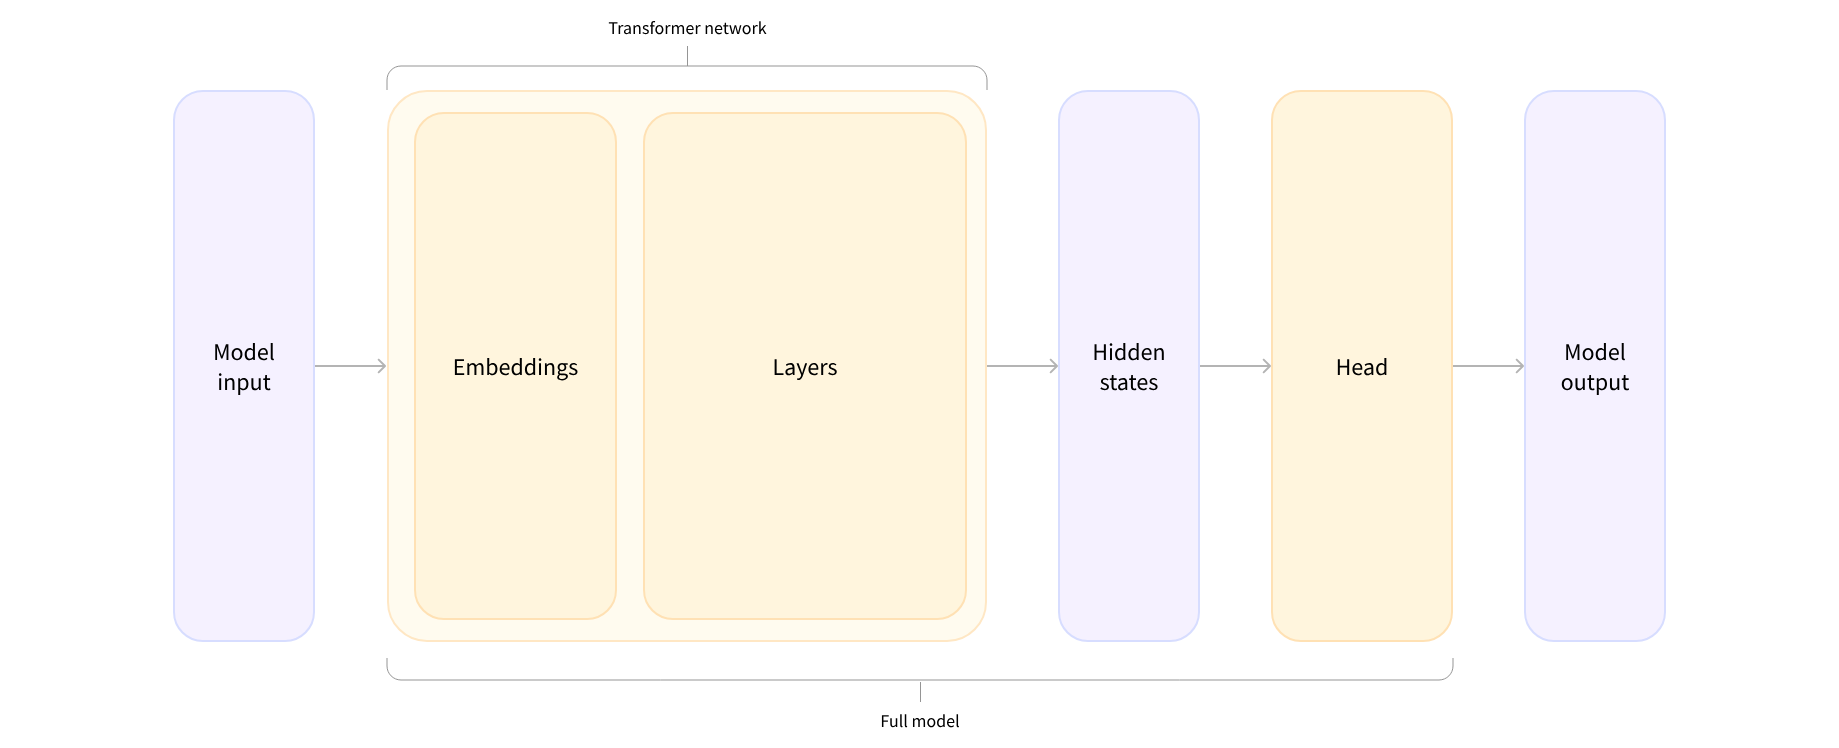

Like we used AutoModelForSequenceClassification, there are many different architectures available in `transformers`, with each one designed around tackling a specific task. Here is a non-exhaustive list:

* Model (retrieve the hidden states)
* ForCausalLM
* ForMaskedLM
* ForMultipleChoice
* ForQuestionAnswering
* ForSequenceClassification
* ForTokenClassification
and others 🤗

## Models and `AutoModel`
`AutoModel` class is handy when you want to instantiate any model from a checkpoint.

The `AutoModel` class and all of its relatives are actually simple wrappers over the wide variety of models available in the library. It's a clever wrapper as it can automatically guess the appropriate model architecture for your checkpoint, and then instantiates a model with this architecture. However, if we know the type of model we want to use, we can use the class that defines its architecture directly.

In [ ]:
from transformers import BertModel, BertConfig

## Build the configuration
config = BertConfig()
print(config)


## Build model from config
model = BertModel(config)

BertConfig {
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.30.2",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}



There are multiple ways to load and initialize a model. Creating a model from the default configuration initializes it with random values.

In [ ]:
from transformers import BertConfig, BertModel

config = BertConfig()

model = BertModel(config)

The above `model` was randomly intitialized. It is not a pretrained model, and only has randomly initialized weights. At this point, if used for inference, it would only output garbage.

However, this model can be trained. Note that, training a LLM from scratch requires tremendous computing power, time and a massive dataset.

A better way is to initialize the model using pretrained weights.

In [ ]:
from transformers import BertModel

model = BertModel.from_pretrained('bert-base-cased')

print(model)

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(28996, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
  

**NOTE:** We instantiated the `BertModel` class using pretrained weights.

However, we could have also used the `AutoModel` class. The `AutoModel` class is smart to detect the pretrained weights passed to it, and loads the appropriate architecture for us- Bert in this case.

**NOTE 2:** When we instantiate the model using pretrained weights, we need not load the config. However, that was required if we simply create the model object without loading any pretrained weights.


## Saving the models

If we have finetuned the model, we can save it to disk in order to use it for inference later.

In [ ]:
model.save_pretrained("./saved_models")

Executing the above line creates two files in the directory:


*   `config.json`
  * This file contains attributes necessary to build the model architecture
  * It also contains metadata, such as where the checkpoint originated and what  `transformers` version we used when we last saved the checkpoint.
*   `pytorch_model.bin`: Known as the **state dictionary**; it contains all our model's weights.

Both the files are required. The configuration is necessary to know our model's architecture, while the model weights are our model's parameters.





---

# Tokenizers

In NLP, most of the times, input is in the form of raw text. As models only understand numbers, the input text needs to be converted into numbers. It is the job of a tokenizer to translate text into numbers.

While there are several possible ways of converting text to numbers, the objective is to arrive at numbers that encode the contextual meaning of the sentence.

## Types of tokentizers
Tokenizers can be


*   Word-based
*   Subword-based
*   Character-based




### Word-based tokenizers
Each word is assigned a number

**Advantage:**
* Whole words carry important meaning, hence, each number has useful information.
* Easy to set up, fewer rules

**Limitation:**
* Words that have similar meaning need to have simular numerical representation, yet should be distinct as they are different words. Same goes for different word forms.
 * Eg. Words 'dog' and 'dogs' are very similar, and their meaning is close. However, word-based tokentizers will assign entirely different ID to these two words. This will make the model learn two entirely different embeddings for these two words.

* Lots of words in vocabulary. Vocabulary can be very large. Each word will have a different ID.

* **OOV (out of vocabulary) words** If a word appears, for which mapping to a number does not exist, such words cannot be handled efficiently by the tokenizer. Eg. "Googlification". This is handled by assigning OOV category number to the OOV word. This is a compromise, as for every unknown word appearing in corpus, the same OOV mapping will be picked.




### Character tokenizers
They tokenize the sequence into individual characters.

**Advantages:**
* Limited number of distinct tokens, as the vocabulary just comprises of all possible characters rather than words
* Much fewer OOV tokens. Each word can be constructed by combining character tokens. An OOV will happen, only if the character does not exist in the vocabulary.

**Disadvantages:**
* Since the representation is now based on characters rather than words, one could argue that, intuitively, it's less meaningful: each character doesn't mean a lot on its own, whereas that is the case with words.
* We'll end up with a very large amount of tokens to be processed by our model: whereas a word would only be a single token with a word-based tokenizer, it can easily turn into 10 or more tokens when converted into characters.



### Subword tokenizers
**GOAL:** Frequently used words should not be split into smaller subwords, but rare words should be decomposed into meaningful subwords. Eg., `Let's do tokenization!` can be split using subword tokenizer. This provides us the best of both word based and character based tokentizers.

**Adavntage:**
* Subwords end up providing a lot of **semantic meaning**: for instance, in the example above “tokenization” was split into “token” and “ization”, two tokens that have a semantic meaning while being space-efficient (only two tokens are needed to represent a long word). This allows us to have relatively good coverage with small vocabularies, and close to no unknown tokens.


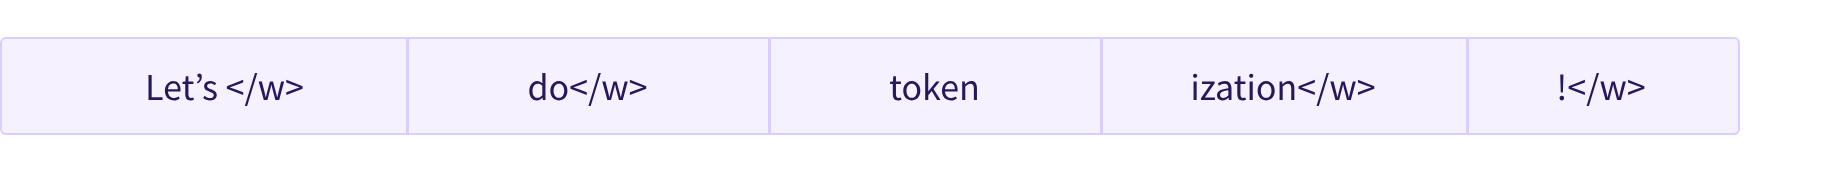